In [39]:
import numpy as np
import pandas as pd

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
data=pd.read_csv('/content/drive/My Drive/Novartis_data/Train.csv')
data1=pd.read_csv('/content/drive/My Drive/Novartis_data/Test.csv')

In [42]:
data.head(3)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1


In [43]:
data1.head(3)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34


1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64


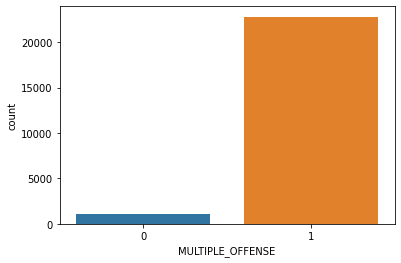

In [44]:
import seaborn as sns
print(data.MULTIPLE_OFFENSE.value_counts())
sns.countplot(x='MULTIPLE_OFFENSE',data=data)

In [45]:
data.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [46]:
data1.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [47]:
print(data.dtypes)

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object


In [48]:
print(data.X_12.value_counts())


1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64


In [49]:
data["X_12"].fillna(1, inplace = True)
data1["X_12"].fillna(1, inplace = True)



In [50]:
data.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [51]:
# Defining Categorical Features
categorical_feature= ["INCIDENT_ID", "DATE ", ]

# Defining Continuous Features
continuous_features = ["X_1", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7", "X_8","X_9","X_10","X_11","X_12","X_13","X_14","X_15"]

In [52]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to Tranform data
s_sc = MinMaxScaler()

# Transform data of Continuous Features
data[continuous_features] = s_sc.fit_transform(data[continuous_features])

# Show head after converting
data.head(2)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0.000000,0.692308,0.653846,0.2,0.2,0.222222,0.333333,0.010101,1.0,0.0,0.524096,0.011111,0.793103,0.204225,0.72,0
1,CR_189752,18-JUL-17,0.142857,0.711538,0.711538,0.0,0.0,0.555556,0.944444,0.010101,1.0,0.0,0.710843,0.011111,0.887931,1.000000,0.68,1


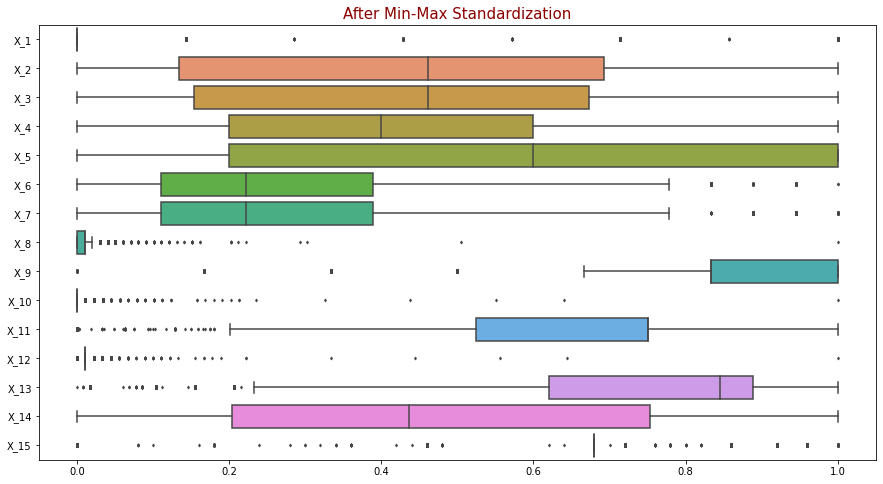

In [53]:
from matplotlib import pyplot as plt
fig = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(data = data[continuous_features], orient="h", fliersize=2)
ax.set_title("After Min-Max Standardization", color='DarkRed', fontsize=15)
    
# Display the plot
plt.savefig('data_BoxPlotAll.png')
plt.show()

(15.5, -0.5)

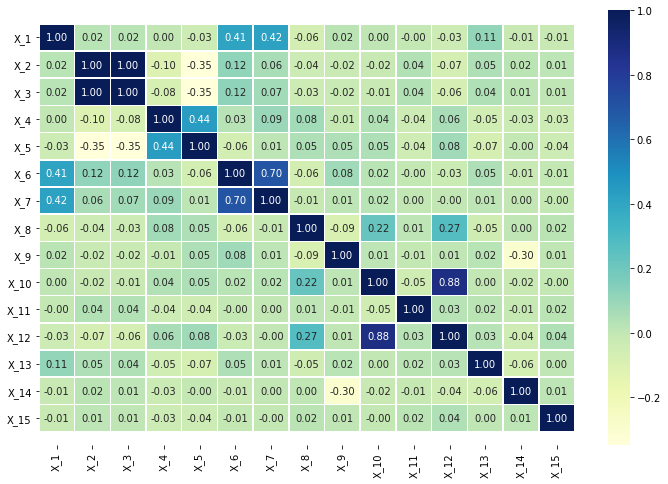

In [54]:
# Let's make our correlation matrix a little prettier

# Get Correlation Matrix for Continuous Features only using pearson method 
corr_matrix = data[continuous_features].corr(method ='pearson')

# Set no. of rows and column for sub plots
fig, ax = plt.subplots(figsize=(12, 8))

# Pass corr_matrix to heamap to draw and set the parameters
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
ax.set_ylim(bottom + 0.5, top - 0.5)

In [55]:
import statsmodels.api as sm
cols = data.columns[:-1]
model = sm.Logit(data.MULTIPLE_OFFENSE, data[continuous_features])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.150377
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MULTIPLE_OFFENSE   No. Observations:                23856
Model:                          Logit   Df Residuals:                    23841
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Jun 2020   Pseudo R-squ.:                  0.1774
Time:                        17:18:58   Log-Likelihood:                -3587.4
converged:                       True   LL-Null:                       -4361.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X_1            0.7730      0.235      3.284      0.001       0.312       1.234
X_2           -2.9787      1.648     -1.808      0.071      -6.208       0.251
X_3            2.9613      1.665      1.778      0.075      -0.302       6.225
X_4            0.2226      0.140      1.587      0.112      -0.052       0.497
X_5            0.0871      0.104      0.837      0.402      -0.117       0.291
X_6            0.3476      0.199      1.743      0.081      -0.043       0.739
X_7           -0.2999      0.227     -1.321      0.187      -0.745       0.145
X_8            0.5628      2.433      0.231      0.817      -4.205       5.331
X_9            0.7776      0.123      6.323      0.000       0.537       1.019
X_10        -154.8683      5.076    -30.513      0.000    -164.816    -144.920
X_11           1.6623      0.114     14.635      0.000       1.440       1.885
X_12          96.5326      4.630     20.849      0.000      87.458     105.607
X_13           0.3683      0.121      3.050      0.002       0.132       0.605
X_14           0.2492      0.104      2.401      0.016       0.046       0.453
X_15           0.9628      0.128      7.542      0.000       0.713       1.213
==============================================================================
"""

In [56]:
def back_feature_elem (data_frame, dep_var, col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the
    regression repeatedly eleminating feature with the highest P-value above alpha one at a
    time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col_list = col_list.remove(largest_pvalue.index)
            return result

In [57]:
result = back_feature_elem(data, data.MULTIPLE_OFFENSE, continuous_features)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MULTIPLE_OFFENSE   No. Observations:                23856
Model:                          Logit   Df Residuals:                    23841
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Jun 2020   Pseudo R-squ.:                  0.1774
Time:                        17:18:58   Log-Likelihood:                -3587.4
converged:                       True   LL-Null:                       -4361.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X_1            0.7730      0.235      3.284      0.001       0.312       1.234
X_2           -2.9787      1.648     -1.808      0.071      -6.208       0.251
X_3            2.9613      1.665      1.778      0.075      -0.302       6.225
X_4            0.2226      0.140      1.587      0.112      -0.052       0.497
X_5            0.0871      0.104      0.837      0.402      -0.117       0.291
X_6            0.3476      0.199      1.743      0.081      -0.043       0.739
X_7           -0.2999      0.227     -1.321      0.187      -0.745       0.145
X_8            0.5628      2.433      0.231      0.817      -4.205       5.331
X_9            0.7776      0.123      6.323      0.000       0.537       1.019
X_10        -154.8683      5.076    -30.513      0.000    -164.816    -144.920
X_11           1.6623      0.114     14.635      0.000       1.440       1.885
X_12          96.5326      4.630     20.849      0.000      87.458     105.607
X_13           0.3683      0.121      3.050      0.002       0.132       0.605
X_14           0.2492      0.104      2.401      0.016       0.046       0.453
X_15           0.9628      0.128      7.542      0.000       0.713       1.213
==============================================================================
"""

In [58]:
import random

x = data[continuous_features]



y = data.iloc[:, -1]
class_names = data.MULTIPLE_OFFENSE


random.seed(100)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [59]:
x.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0.000000,0.692308,0.653846,0.2,0.2,0.222222,0.333333,1.0,0.0,0.524096,0.011111,0.793103,0.204225,0.72
1,0.142857,0.711538,0.711538,0.0,0.0,0.555556,0.944444,1.0,0.0,0.710843,0.011111,0.887931,1.000000,0.68


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
!pip install joblib
# Logistic Regression Model
classifierLR = LogisticRegression()
classifierLR.fit(x_train,y_train)
classifierLR.score(x_test, y_test)
print('LogisticRegression LogLoss {score}'.format(score=log_loss(y_test, classifierLR.predict_proba(x_test))))
joblib.dump(classifierLR, "CHD_LogisticRegression.pkl")


LogisticRegression LogLoss 0.17154772490092005


NameError: ignored

[[   0  318]
 [   1 6838]]


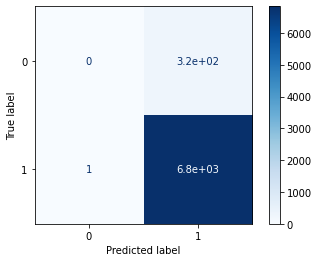

In [61]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifierLR, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)


In [62]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
text_s = data1[continuous_features]
predictions = logmodel.predict(text_s)


In [63]:
print(predictions)

[1 1 1 ... 0 1 1]


In [64]:
data1['predictions'] = predictions
data1.to_csv('data1.csv')

In [65]:
data1.head(2)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,predictions
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23,1
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34,1


In [66]:
data1=data1.drop(columns=["X_1","DATE", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7", "X_8","X_9","X_10","X_11","X_12","X_13","X_14","X_15"],axis=1)

In [67]:
data1.head(2)

,INCIDENT_ID,predictions
0,CR_195453,1
1,CR_103520,1


In [68]:
data1 = data1.rename(columns={'predictions': 'MULTIPLE_OFFENSE'})

In [71]:
data1.head(2)

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1


In [81]:
data1.to_csv(r'/content/drive/My Drive/Novartis_data/submission.csv')
